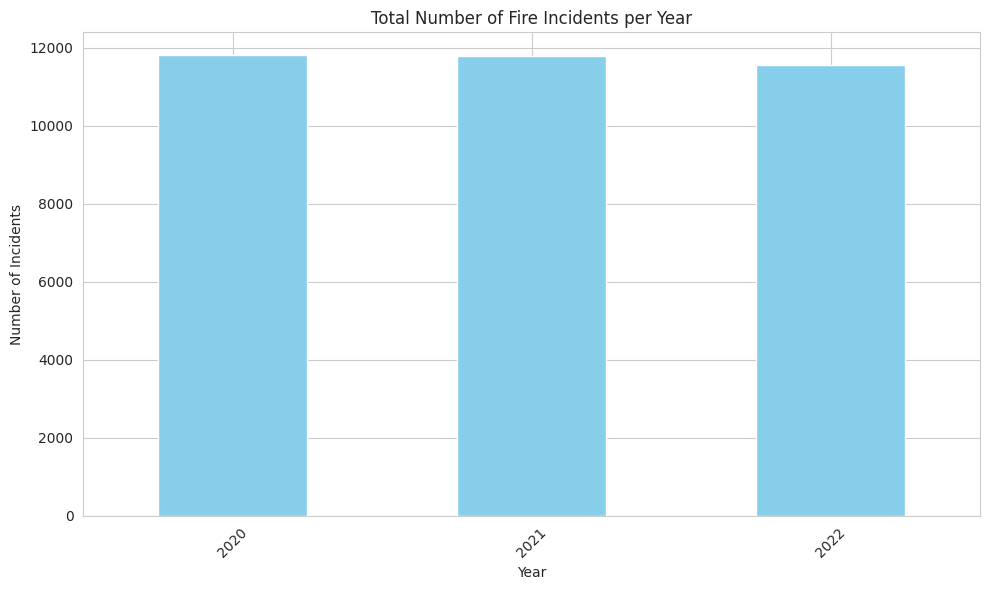

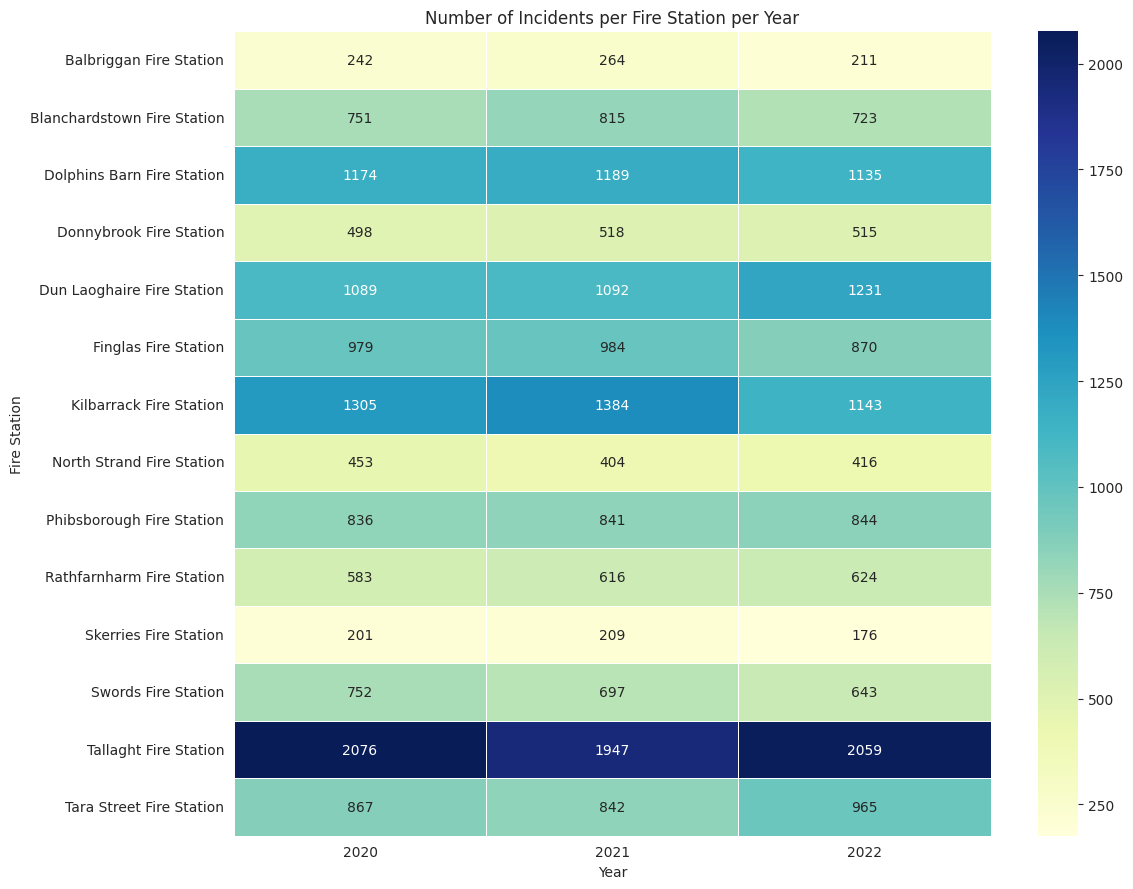

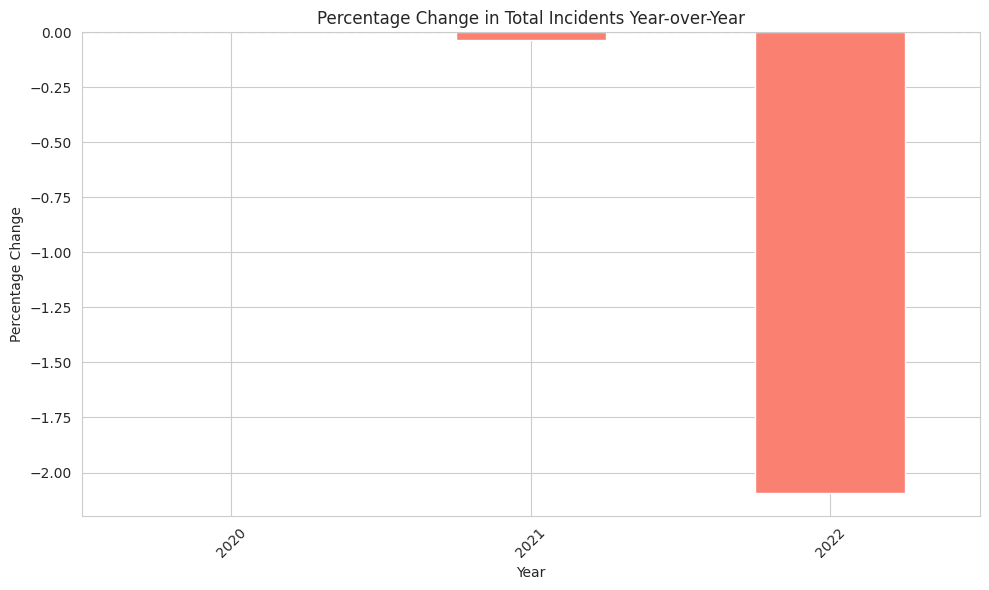

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = '/content/df-opendata-2020-to-2022-with-stn-area.xlsx'  # Update this path to your file location
data = pd.read_excel(file_path)

# Prepare the data
data['Year'] = data['Date'].dt.year
incident_types_yearly = data.groupby(['Year', 'Description']).size().unstack(fill_value=0)
incidents_per_station_yearly = data.groupby(['Year', 'Station Name']).size().unstack(fill_value=0)
total_incidents_yearly = data.groupby('Year').size()
percentage_change_yearly = total_incidents_yearly.pct_change() * 100

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Visualization 1: Yearly Incident Counts
plt.figure(figsize=(10, 6))
total_incidents_yearly.plot(kind='bar', color='skyblue')
plt.title('Total Number of Fire Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 3: Incidents per Station per Year (Heatmap)
plt.figure(figsize=(12, 9))
sns.heatmap(incidents_per_station_yearly.transpose(), annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Number of Incidents per Fire Station per Year')
plt.xlabel('Year')
plt.ylabel('Fire Station')
plt.tight_layout()
plt.show()

# Visualization 4: Percentage Change in Total Incidents Year-over-Year
plt.figure(figsize=(10, 6))
percentage_change_yearly.plot(kind='bar', color='salmon')
plt.title('Percentage Change in Total Incidents Year-over-Year')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
